In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 16 22:41:45 2021

@author: pmarc
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
import statsmodels.api as sm
import scipy.stats as sts
# statsmodels.formula.api import ols
import math


In [3]:


donnee = pd.read_csv('../Fichiers/DonneesBiometriquesv0r2.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)



In [4]:

"Préparation des matrices"

X=donnee
X=pd.get_dummies(X)
X=X.drop({'Poids (kg)','Genre_Homme'},1)
Y=donnee['Poids (kg)']

MatriceR=(pd.get_dummies(donnee)).corr()


/tmp/ipykernel_34832/992414465.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop({'Poids (kg)','Genre_Homme'},1)


In [5]:
X.head()

,coude_dia (cm),poignet_dia (cm),genou_dia (cm),cheville_dia (cm),épaule_tour (cm),pec_tour (cm),taille_tour (cm),abdomen_tour (cm),hanche_tour (cm),bicept_tour (cm),avantbras_tour (cm),genou_tour (cm),cheville_tour (cm),poignet_tour (cm),Âge,Grandeur (cm),Genre_Femme
0,13.1,10.4,18.8,14.1,106.2,89.5,71.5,74.5,93.5,32.5,26.0,34.5,23.5,16.5,21,174.0,0
1,14.0,11.8,20.6,15.1,110.5,97.0,79.0,86.5,94.8,34.4,28.0,36.5,24.5,17.0,23,175.3,0
2,13.9,10.9,19.7,14.1,115.1,97.5,83.2,82.9,95.0,33.4,28.8,37.0,21.9,16.9,28,193.5,0
3,13.9,11.2,20.9,15.0,104.5,97.0,77.8,78.8,94.0,31.0,26.2,37.0,23.0,16.6,23,186.5,0
4,15.2,11.6,20.7,14.9,107.5,97.5,80.0,82.5,98.5,32.0,28.4,37.7,24.4,18.0,22,187.2,0


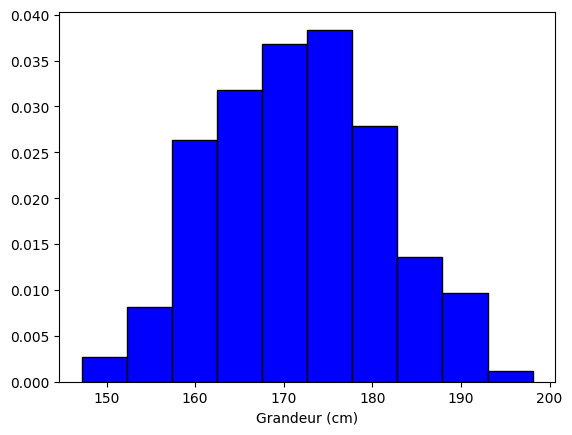

In [6]:

"%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%"
"Intervalle de confiance autour de l'estimé de la grandeur moyenne et de la variance"

VarGrandeur=X['Grandeur (cm)']

ax=plt.hist(VarGrandeur,density=True, bins = 10, color = 'blue', edgecolor = 'black')
plt.xlabel("Grandeur (cm)")

X_barre=VarGrandeur.mean()
s=VarGrandeur.std()
n=VarGrandeur.shape[0]

mhu_min=X_barre-sts.t.isf(0.05/2,n-1)*s/math.sqrt(n)
mhu_max=X_barre+sts.t.isf(0.05/2,n-1)*s/math.sqrt(n)

Inter_mhu=sts.t.interval(0.95, n-1, loc=X_barre, scale=s/math.sqrt(n))

sigma2_est=s**2
sigma2_min=(n-1)*s**2/sts.chi2.isf(0.05/2,n-1)
sigma_min=math.sqrt(sigma2_min)

sigma2_max=(n-1)*s**2/sts.chi2.isf(1-0.05/2,n-1)
sigma_max=math.sqrt(sigma2_max)



In [7]:

"%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%"
"Normalisation/Standardisation et régression multilinéaire"

from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler() 
Xnorm = scalerX.fit_transform(X.values)
scalerY = MinMaxScaler() 
Ynorm = scalerY.fit_transform(Y.values.reshape(-1,1))
Xnorm=pd.DataFrame(Xnorm)
Xnorm.columns=X.columns
Ynorm=pd.DataFrame(Ynorm)
Ynorm.columns=["Poids (kg)"]

modele=sm.OLS(Ynorm,Xnorm.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(Xnorm.assign(const=1))
resultats.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Poids (kg)   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     989.2
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:09:36   Log-Likelihood:                 1056.3
No. Observations:                 507   AIC:                            -2077.
Df Residuals:                     489   BIC:                            -2001.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
coude_dia (cm)          0.0125      0.018      0.694      0.488      -0.023       0.048
poignet_dia (cm)        0.0045      0.017      0.265      0.791      -0.029       0.038
genou_dia (cm)          0.0660      0.017      3.913      0.000       0.033       0.099
cheville_dia (cm)       0.0167      0.017      1.005      0.315      -0.016       0.049
épaule_tour (cm)        0.0492      0.021      2.383      0.018       0.009       0.090
pec_tour (cm)           0.1077      0.023      4.635      0.000       0.062       0.153
taille_tour (cm)        0.3041      0.022     14.028      0.000       0.262       0.347
abdomen_tour (cm)      -0.0259      0.020     -1.311      0.191      -0.065       0.013
hanche_tour (cm)        0.2498      0.024     10.448      0.000       0.203       0.297
bicept_tour (cm)        0.0553      0.023      2.406      0.017       0.010       0.100
avantbras_tour (cm)     0.1072      0.026      4.184      0.000       0.057       0.157
genou_tour (cm)         0.1134      0.022      5.264      0.000       0.071       0.156
cheville_tour (cm)      0.0342      0.018      1.948      0.052      -0.000       0.069
poignet_tour (cm)      -0.0393      0.019     -2.023      0.044      -0.078      -0.001
Âge                    -0.0430      0.008     -5.093      0.000      -0.060      -0.026
Grandeur (cm)           0.2043      0.012     16.390      0.000       0.180       0.229
Genre_Femme             0.0326      0.007      4.469      0.000       0.018       0.047
const                  -0.1494      0.010    -14.486      0.000      -0.170      -0.129
==============================================================================
Omnibus:                       31.783   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.775
Skew:                           0.347   Prob(JB):                     1.16e-15
Kurtosis:                       4.666   Cond. No.                         49.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:

"Standardisation"

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
Xstand = scalerX.fit_transform(X.values)
scalerY = StandardScaler() 
Ystand = scalerY.fit_transform(Y.values.reshape(-1,1))
Xstand=pd.DataFrame(Xstand)
Xstand.columns=X.columns
Ystand=pd.DataFrame(Ystand)
Ystand.columns=["Poids (kg)"]

modele=sm.OLS(Ystand,Xstand.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(Xstand.assign(const=1))
resultats.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Poids (kg)   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     989.2
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:10:02   Log-Likelihood:                 184.69
No. Observations:                 507   AIC:                            -333.4
Df Residuals:                     489   BIC:                            -257.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
coude_dia (cm)          0.0138      0.020      0.694      0.488      -0.025       0.053
poignet_dia (cm)        0.0045      0.017      0.265      0.791      -0.029       0.038
genou_dia (cm)          0.0576      0.015      3.913      0.000       0.029       0.087
cheville_dia (cm)       0.0159      0.016      1.005      0.315      -0.015       0.047
épaule_tour (cm)        0.0581      0.024      2.383      0.018       0.010       0.106
pec_tour (cm)           0.1305      0.028      4.635      0.000       0.075       0.186
taille_tour (cm)        0.3376      0.024     14.028      0.000       0.290       0.385
abdomen_tour (cm)      -0.0238      0.018     -1.311      0.191      -0.060       0.012
hanche_tour (cm)        0.1879      0.018     10.448      0.000       0.153       0.223
bicept_tour (cm)        0.0654      0.027      2.406      0.017       0.012       0.119
avantbras_tour (cm)     0.1311      0.031      4.184      0.000       0.070       0.193
genou_tour (cm)         0.0828      0.016      5.264      0.000       0.052       0.114
cheville_tour (cm)      0.0275      0.014      1.948      0.052      -0.000       0.055
poignet_tour (cm)      -0.0459      0.023     -2.023      0.044      -0.090      -0.001
Âge                    -0.0471      0.009     -5.093      0.000      -0.065      -0.029
Grandeur (cm)           0.2105      0.013     16.390      0.000       0.185       0.236
Genre_Femme             0.0909      0.020      4.469      0.000       0.051       0.131
const                1.041e-17      0.008   1.37e-15      1.000      -0.015       0.015
==============================================================================
Omnibus:                       31.783   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.775
Skew:                           0.347   Prob(JB):                     1.16e-15
Kurtosis:                       4.666   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
Xstand.head()

,coude_dia (cm),poignet_dia (cm),genou_dia (cm),cheville_dia (cm),épaule_tour (cm),pec_tour (cm),taille_tour (cm),abdomen_tour (cm),hanche_tour (cm),bicept_tour (cm),avantbras_tour (cm),genou_tour (cm),cheville_tour (cm),poignet_tour (cm),Âge,Grandeur (cm),Genre_Femme
0,-0.211019,-0.151154,-0.007911,0.189939,-0.192489,-0.382675,-0.498053,-1.184710,-0.476604,0.313564,0.020158,-0.651230,0.721636,0.291804,-0.956502,0.303920,-1.025978
1,0.454873,1.332794,1.329120,0.992429,0.222385,0.365998,0.183653,0.089875,-0.281819,0.761387,0.727425,0.113592,1.259126,0.654237,-0.748147,0.442248,-1.025978
2,0.380885,0.378827,0.660605,0.189939,0.666203,0.415910,0.565408,-0.292501,-0.251852,0.525691,1.010332,0.304797,-0.138348,0.581750,-0.227259,2.378846,-1.025978
3,0.380885,0.696816,1.551959,0.912180,-0.356509,0.365998,0.074580,-0.727984,-0.401686,-0.039980,0.090885,0.304797,0.452891,0.364291,-0.748147,1.634001,-1.025978
4,1.342729,1.120801,1.403400,0.831931,-0.067062,0.415910,0.274547,-0.334987,0.272569,0.195716,0.868878,0.572485,1.205377,1.379101,-0.852325,1.708485,-1.025978


In [11]:
cols_drop=['poignet_dia (cm)', 'coude_dia (cm)', 'cheville_dia (cm)', 'abdomen_tour (cm)']
X2 = Xstand.drop(cols_drop, axis=1)

In [12]:
X2.head()

,genou_dia (cm),épaule_tour (cm),pec_tour (cm),taille_tour (cm),hanche_tour (cm),bicept_tour (cm),avantbras_tour (cm),genou_tour (cm),cheville_tour (cm),poignet_tour (cm),Âge,Grandeur (cm),Genre_Femme
0,-0.007911,-0.192489,-0.382675,-0.498053,-0.476604,0.313564,0.020158,-0.651230,0.721636,0.291804,-0.956502,0.303920,-1.025978
1,1.329120,0.222385,0.365998,0.183653,-0.281819,0.761387,0.727425,0.113592,1.259126,0.654237,-0.748147,0.442248,-1.025978
2,0.660605,0.666203,0.415910,0.565408,-0.251852,0.525691,1.010332,0.304797,-0.138348,0.581750,-0.227259,2.378846,-1.025978
3,1.551959,-0.356509,0.365998,0.074580,-0.401686,-0.039980,0.090885,0.304797,0.452891,0.364291,-0.748147,1.634001,-1.025978
4,1.403400,-0.067062,0.415910,0.274547,0.272569,0.195716,0.868878,0.572485,1.205377,1.379101,-0.852325,1.708485,-1.025978


In [13]:
modele=sm.OLS(Ystand,X2.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(X2.assign(const=1))
resultats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Poids (kg)   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1294.
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:19:06   Log-Likelihood:                 182.74
No. Observations:                 507   AIC:                            -337.5
Df Residuals:                     493   BIC:                            -278.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
genou_dia (cm)          0.0679      0.013      5.057      0.000       0.042       0.094
épaule_tour (cm)        0.0600      0.024      2.531      0.012       0.013       0.107
pec_tour (cm)           0.1338      0.027      4.881      0.000       0.080       0.188
taille_tour (cm)        0.3220      0.022     14.717      0.000       0.279       0.365
hanche_tour (cm)        0.1786      0.016     10.913      0.000       0.146       0.211
bicept_tour (cm)        0.0577      0.027      2.150      0.032       0.005       0.110
avantbras_tour (cm)     0.1406      0.031      4.604      0.000       0.081       0.201
genou_tour (cm)         0.0791      0.016      5.097      0.000       0.049       0.110
cheville_tour (cm)      0.0305      0.014      2.250      0.025       0.004       0.057
poignet_tour (cm)      -0.0389      0.021     -1.855      0.064      -0.080       0.002
Âge                    -0.0481      0.009     -5.525      0.000      -0.065      -0.031
Grandeur (cm)           0.2154      0.012     17.871      0.000       0.192       0.239
Genre_Femme             0.0791      0.019      4.103      0.000       0.041       0.117
const               -5.985e-17      0.008  -7.87e-15      1.000      -0.015       0.015
==============================================================================
Omnibus:                       27.959   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.983
Skew:                           0.306   Prob(JB):                     1.56e-13
Kurtosis:                       4.555   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""